# Data Visualization

### Objectives

* Answer business requirement 1 :
    - The client seeks to undertake a study aimed at visually differentiating healthy bones from fractured ones.

### Inputs

* inputs/fracture_dataset/bone_fracture/bone_fracture/test
* inputs/fracture_dataset/bone_fracture/bone_fracture/train
* inputs/fracture_dataset/bone_fracture/bone_fracture/val

### Outputs

* Scatterplot of the image shape.
* Mean and variability of images per label plot.
* Plot to distinguish contrast between healthy bone and fractured bone images.
* Generate code that answers business requirement 1 and can be used to build image montage on Streamlit dashboard.

---

# Set Data Directory

### Import libraries

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from matplotlib.image import imread

### Set Working directory

In [2]:
current_dir = os.getcwd()
current_dir

'/workspace/Bone-Fracture-Detection/jupyter_notebooks'

In [3]:
os.chdir('/workspace/Bone-Fracture-Detection')

In [4]:
work_dir = os.getcwd()
work_dir

'/workspace/Bone-Fracture-Detection'

### Set input directory

In [5]:
parent_path = 'inputs/fracture_dataset/bone_fracture/bone_fracture'
train_path = parent_path + '/train'
val_path = parent_path + '/val'
test_path = parent_path + '/test'

### Set output directory

In [6]:
version = 'v1'
file_path = f'outputs/{version}'

if 'outputs' in os.listdir(work_dir) and version in os.listdir(work_dir + '/outputs'):
	print('Old version is already available create a new version.')
	pass
else:
	os.makedirs(name = file_path)

### Set label names

In [7]:
labels = os.listdir(train_path)
print('Folders inside the train test and val folders are :', labels)

Folders inside the train test and val folders are : ['fractured', 'unfractured']


---

# Data visualisation of bone fracture data

### Scatterplot with average image size

Calculates the average size of the images in the training set, then plots it into a scatterplot for better visualisation.

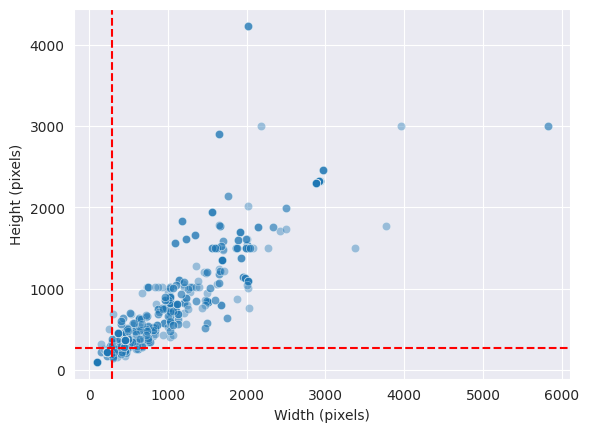

Width average: 273 
Height average: 290


In [8]:
x_dim, y_dim = [], []
for label in labels:
	for image_name in os.listdir(train_path + '/' + label):
		img = imread(train_path + '/' + label + '/' + image_name)
		dx, dy, colors = img.shape
		x_dim.append(dx)
		y_dim.append(dy)


sns.set_style("darkgrid")
fig, axes = plt.subplots()
sns.scatterplot(x=x_dim, y=y_dim, alpha=0.4)
axes.set_xlabel("Width (pixels)")
axes.set_ylabel("Height (pixels)")
x_dim_mean = int(np.array(x_dim).mean())
y_dim_mean = int(np.array(y_dim).mean())
axes.axhline(y=y_dim_mean, color='r', linestyle='--')
axes.axvline(x=x_dim_mean, color='r', linestyle='--')
plt.show()
print(f"Width average: {y_dim_mean} \nHeight average: {x_dim_mean}")

Stores the average image size in a variable.

In [9]:
mean_image = (x_dim_mean, y_dim_mean, 3)
mean_image

(290, 273, 3)

Saves the variable in the output folder

In [10]:
joblib.dump(value=mean_image, filename=f"{file_path}/image_shape.pkl")

['outputs/v1/image_shape.pkl']

---

# Mean and Variability of the images

This function creates empty arrays then loads the images with the new image size then appends the new images into the empty arrays.

In [11]:
from tensorflow.keras.preprocessing import image


def load_image_as_array(data_dir, new_size=(50,50), n_images_per_label = 20):
	X, y = np.array([], dtype='int'), np.array([], dtype='object')
	labels = os.listdir(data_dir)

	for label in labels:
		counter = 0
	for image_filename in os.listdir(data_dir + '/' + label):
		if counter < n_images_per_label:
			img = image.load_img(data_dir + '/' + label + '/' + image_filename, target_size=new_size)
		if image.img_to_array(img).max() > 1: 
			img_resized = image.img_to_array(img) / 255
		else: 
			img_resized = image.img_to_array(img)
		
		X = np.append(X, img_resized).reshape(-1, new_size[0], new_size[1], img_resized.shape[2])
		y = np.append(y, label)
		counter += 1

	return X, y

Loads the mean image shape and labels in an array

In [12]:
X, y = load_image_as_array(data_dir=train_path,
                           new_size=mean_image,
                           n_images_per_label = 30)
print(X.shape, y.shape)

Plot and save mean and variability of images per label. This function loops through the labels, then subsets an array for a given label, then calculates the mean and standard deviation, then creats a figure showing the mean and variability of the images, and saves the image.

In [ ]:
def plot_mean_variability_per_labels(X, y, figsize=(12,5), save_image=False):
	for label_to_display in np.unique(y):
		sns.set_style("white")

		y = y.reshape(-1,1,1)
		boolean_mask = np.any(y==label_to_display, axis=1).reshape(-1)
		arr = X[boolean_mask]

		avg_img = np.mean(arr, axis = 0)
		std_img = np.std(arr, axis = 0)
		print(f"==== Label {label_to_display} ====")
		print(f"Image Shape: {avg_img.shape}")
		fig, axes = plt.subplots(nrows=1, ncols=2, figsize=figsize)
		axes[0].set_title(f"Average Image for label {label_to_display}")
		axes[0].imshow(avg_img, cmap='gray')
		axes[1].set_title(f"Variability image for label {label_to_display}")
		axes[1].imshow(std_img, cmap='gray')

	if save_image:
		plt.savefig(f"{file_path}/avg_var_{label_to_display}.png", bbox_inches='tight', dpi=150)
	else:
		plt.tight_layout()
		plt.show()
		print("\n")

In [ ]:
plot_mean_variability_per_labels(X=X, y=y, figsize=(12,5), save_image=True)

---